<a href="https://colab.research.google.com/github/tkasod2/TIL/blob/main/zerobase/homework/%EB%A5%98%EB%B2%94%EC%83%81__4%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#### 제로베이스(https://zero-base.co.kr/)
#### 바로 써먹는 분석 완주반 
---
#### **Guideline**
- 총점 100점으로 주차별로 약 2~3개 문제가 제시됩니다
- 각 문제마다 안내사항과 요구사항을 꼼꼼하게 확인해주신 후, 코드를 작성해주세요 
- 코드는 제시드리는 결과만 같게 나온다면, 추후 모범답안으로 드리는 코드와 달라도 괜찮습니다 

#### **Notice!** 
- 제출 기한을 반드시 지켜주세요 
- 제출 전 코드가 정상적으로 실행되는지 검토해주세요

---
# **4주차 과제**
- 모두 코드를 입력해야 합니다 (답만 쓰는 경우는 인정되지 않음)
---

**1. 다음 데이터를 활용하여 Logistic Regression 학습을 진행하세요.**

* Python 딥러닝 패키지인 Keras 를 사용합니다.
* optimizer 는 rmpsprop 를 사용합니다.
* batch size 는 train_x 의 총 길이로, epoch 은 2000으로 설정합니다.
* validation data 는 학습 데이터와 동일한 데이터를 사용합니다.

In [ ]:
# keras, tensorflow 를 사용한다
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

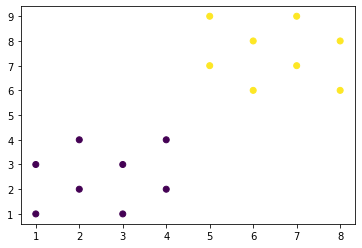

In [ ]:
# 데이터셋 준비
import numpy as np
import matplotlib.pyplot as plt

train_x = [[1,1],[1,3],[2,2],[2,4],[3,1],[3,3],[4,2],[4,4],[5,7],[5,9],[6,6],[6,8],[7,7],[7,9],[8,6],[8,8]]
train_y = [[0],[0],[0],[0],[0],[0],[0],[0],[1],[1],[1],[1],[1],[1],[1],[1]]

train_x = np.array(train_x)
train_y = np.array(train_y)

plt.scatter(train_x[:,0:1], train_x[:,1:2], c=train_y)
plt.show()

In [ ]:
len(train_x)

16

In [ ]:
np.shape(train_x)[1]

2

In [ ]:
# =================================================================================
# 여기에 코드를 입력하세요
model = keras.Sequential()  
model.add(layers.Dense(1, input_dim = np.shape(train_x)[1], activation = 'sigmoid', name = 'contributions'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 

model.fit(train_x, train_y, batch_size=len(train_x), epochs=2000, validation_data=(train_x, train_y), verbose=1) 

# =================================================================================

Epoch 1/2000
1/1 [==============================] - 0s 462ms/step - loss: 1.2425 - accuracy: 0.5000 - val_loss: 1.2341 - val_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 58ms/step - loss: 1.2341 - accuracy: 0.5000 - val_loss: 1.2280 - val_accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 76ms/step - loss: 1.2280 - accuracy: 0.5000 - val_loss: 1.2229 - val_accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.2229 - accuracy: 0.5000 - val_loss: 1.2183 - val_accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 56ms/step - loss: 1.2183 - accuracy: 0.5000 - val_loss: 1.2142 - val_accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 50ms/step - loss: 1.2142 - accuracy: 0.5000 - val_loss: 1.2103 - val_accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 59ms/step - loss: 1.2103 - accuracy: 0.5000 - val_loss: 1.2067 - val_accuracy: 0.5000
Epoch 8/2000

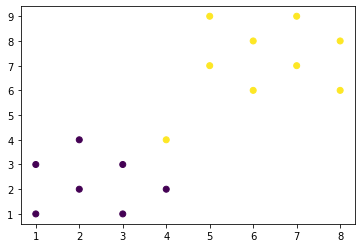

In [ ]:
# model로 예측한 값 확인하기

# train_x 에 대한 예측값 확인
answers = model.predict(train_x, batch_size=16)

# sigmoid 함수로 나온 결과에서 0.5 이상이면 1, 이하면 0으로 설정
y = [1 if answer > 0.5 else 0 for answer in answers]
plt.scatter(train_x[:,0:1], train_x[:,1:2], c=y)
plt.show()

**2. 텍스트 전처리 함수를 구현하세요.**

* 문자열을 입력으로 받아 소문자화, 문장 부호 제거, 토크나이징, 불용어 처리, 축약어 정규화, stemming을 진행합니다.
* 함수는 토큰의 리스트를 반환합니다.
* 기초적인 불용어 목록과 축약어 정규화 함수, stemming 함수는 주어집니다. 그대로 사용하시면 됩니다.
* 테스트를 모두 통과하는 함수를 구현하세요.

In [ ]:
# 텍스트 전처리 구현을 위한 기초적인 단어 목록과 함수
# 수정 없이 그대로 사용하시면 됩니다.

stop_words = ["the", "a", "an", "i", "you", "he", "she", "him", "his", "her", "my", "your", "be", "am", "are", "is", "was", "were", "do", "did", "to"]

contractions_expanded = {"don't": "do not", "aren't": "are not", "isn't": "is not", "i'm": "i am", "can't": "can not"}

def stemming(token):
  # 입력으로 토큰(문자열)을 받습니다.
  # 출력으로 stemming된 토큰을 반환합니다.
  if token.endswith("ing"):
    stem = token[:-3]
  elif token.endswith("es"):
    stem = token[:-2]
  elif token.endswith("ed"):
    stem = token[:-2]
  elif token.endswith("s"):
    stem = token[:-1]
  else:
    stem = token
  return stem

In [ ]:
# import nltk
# nltk.download('punkt')
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def preprocess(text):
  # =================================================================================
  # "pass"를 지우고 여기에 코드를 입력하세요
  # 출력 타입은 문자열의 리스트입니다.

#   문자열을 입력으로 받아 소문자화, 문장 부호 제거, 토크나이징, 불용어 처리, 축약어 정규화, stemming을 진행합니다.
# 함수는 토큰의 리스트를 반환합니다.
# 기초적인 불용어 목록과 축약어 정규화 함수, stemming 함수는 주어집니다. 그대로 사용하시면 됩니다.
# 테스트를 모두 통과하는 함수를 구현하세요.

  lowers = text.lower() # 소문자화
  for x in contractions_expanded.keys():
    lowers = lowers.replace(x,contractions_expanded[x]) # 축약어 정규화 
  doc = nlp(lowers)

  lemmas = [x for x in doc if not x.is_punct] # 문장 부호 제거
  lemmas = [x for x in lemmas if x.text not in stop_words] # 불용어 처리

  corpus = []
  for token in lemmas:
    corpus.append(stemming(str(token))) # stemming

  return corpus

  # pass
  # =================================================================================
# preprocess("I'm going to make him an offer he can't refuse.")

In [ ]:
# 테스트 코드입니다.
# 함수가 제대로 구현되었는지 평가를 위한 코드이니 수정하지 마세요.
# 실행했을 때 아무 에러도 뜨지 않으면 성공입니다.

assert preprocess("The quick brown fox jumps over the lazy dog.") == ['quick', 'brown', 'fox', 'jump', 'over', 'lazy', 'dog']
assert preprocess("I'm going to make him an offer he can't refuse.") == ['go', 'make', 'offer', 'can', 'not', 'refuse']
assert preprocess("After all, tomorrow is another day!") == ['after', 'all', 'tomorrow', 'another', 'day']
assert preprocess("You talking to me?") == ['talk', 'me']
assert preprocess("Keep your friends close, but your enemies closer.") == ['keep', 'friend', 'close', 'but', 'enemi', 'closer']